In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=0ee13459f5a1473b860fb36f8153343f0c11acb7e543e0ca561643cc0b5c7cbe
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
!mkdir known
!wget https://www.businessinsider.de/wp-content/uploads/2019/06/elon-musk.jpg -O known/elon.jpg
!wget https://static.techspot.com/images2/news/bigimage/2020/03/2020-03-14-image-4.jpg -O known/bill.jpg
!wget https://cdn.britannica.com/43/172743-138-545C299D/overview-Barack-Obama.jpg -O known/obama.jpg

--2023-12-09 18:25:20--  https://www.businessinsider.de/wp-content/uploads/2019/06/elon-musk.jpg
Resolving www.businessinsider.de (www.businessinsider.de)... 104.22.66.154, 172.67.29.116, 104.22.67.154, ...
Connecting to www.businessinsider.de (www.businessinsider.de)|104.22.66.154|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn.businessinsider.de/wp-content/uploads/2019/06/elon-musk.jpg [following]
--2023-12-09 18:25:21--  https://cdn.businessinsider.de/wp-content/uploads/2019/06/elon-musk.jpg
Resolving cdn.businessinsider.de (cdn.businessinsider.de)... 104.22.66.154, 172.67.29.116, 104.22.67.154, ...
Connecting to cdn.businessinsider.de (cdn.businessinsider.de)|104.22.66.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202949 (198K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 198.19K  1.25MB/s    in 0.2s    

2023-12-09 18:25:23 (1.25 MB/s) - ‘known/elon.jp

In [3]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://i.imgur.com/nOhVpjn.jpg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg

--2023-12-09 18:26:20--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.05s   

2023-12-09 18:26:20 (46.0 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2023-12-09 18:26:20--  https://i.imgur.com/nOhVpjn.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.20.193
Connecting to i.imgur.com (i.imgur.com)|151.101.20.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962166 (940K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 939.62K  --.-KB/s    in 0.04s   

2023-12-09 18:26:20 (26.1 MB/s) - ‘unknown/2.jpg’ saved [962166/962166]

--2023-12-09 18:26:20--  https://media2.s

Processing 4.jpg


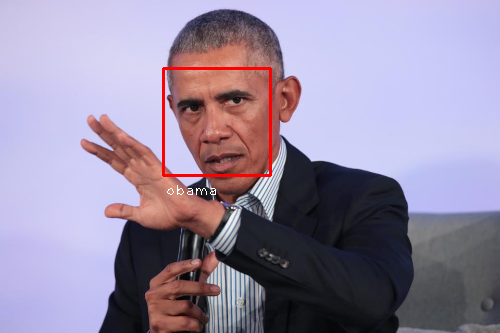

Processing 2.jpg
Processing 1.jpg


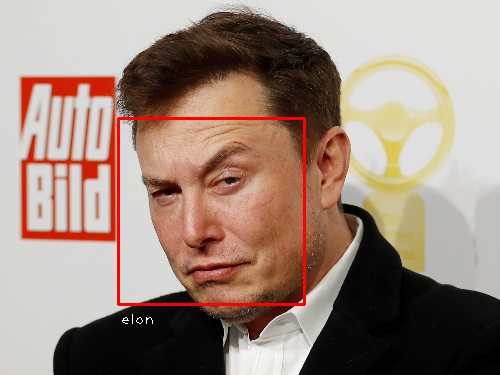

Processing 3.jpg


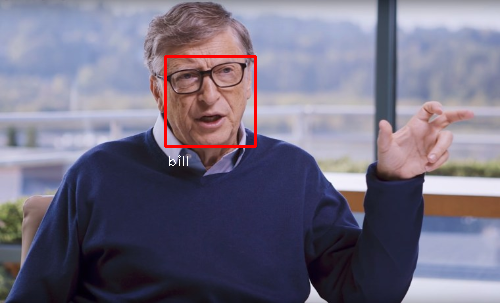

In [4]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)


    # print(results)

